In [696]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas.plotting import scatter_matrix
import tensorflow as tf
from tensorflow import keras 
from copy import deepcopy as copy
from sklearn.metrics import mean_squared_error
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [577]:
def plot_result(Y, T, title=None):
    """
        Plots predicted and true labels.

        Args:
            Y (numpy.ndarray): Predicted labels

            T (numpy.ndarray): True labels

            title (str): Title for the plot
    """
    if len(T.shape) > 1:
        T = T.squeeze()
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Stock Price")
    plt.xlabel("Samples(days)")
    #plt.ylim([-1,4])
    plt.title(title)

    # accuracy
#    print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

In [578]:
df = pd.read_csv("CVS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,28.809999,29.549999,28.559999,29.379999,23.839165,6352800
1,2009-01-05,29.370001,30.049999,29.370001,29.799999,24.179953,8583800
2,2009-01-06,30.000000,30.469999,29.090000,29.350000,23.814823,8914400
3,2009-01-07,29.010000,29.580000,28.750000,29.389999,23.847277,6758100
4,2009-01-08,28.430000,29.389999,27.950001,29.340000,23.806707,8779900
...,...,...,...,...,...,...,...
2763,2019-12-24,74.529999,74.779999,74.360001,74.510002,74.010536,1315400
2764,2019-12-26,74.699997,74.760002,74.139999,74.480003,73.980743,2801100
2765,2019-12-27,74.510002,74.610001,74.040001,74.400002,73.901276,3543500
2766,2019-12-30,74.269997,74.529999,73.610001,73.699997,73.205963,3450800


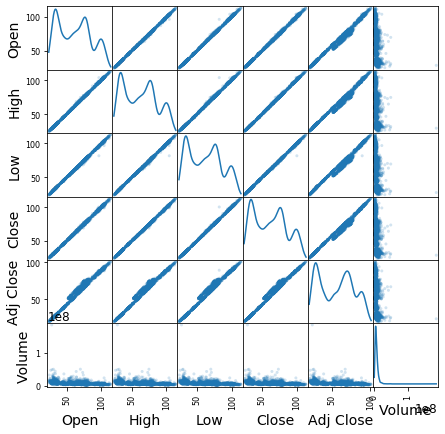

In [579]:
scatter_matrix(df, alpha=0.2, figsize=(7,7), diagonal='kde');

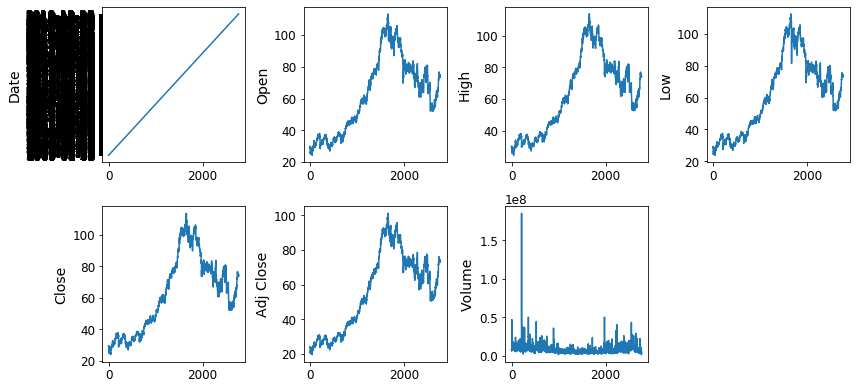

In [580]:
fig = plt.figure(figsize=(12,8))
plt.clf() # Clear previous plt figure
for i in range(7):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(df.iloc[:, i]) # Plots a given column
    plt.ylabel(df.columns.values[i]) # Sets Y label
fig.tight_layout()

In [581]:
closeLog = np.log(df["Close"]) 
closeLog

0       3.380314
1       3.394508
2       3.379293
3       3.380654
4       3.378952
          ...   
2763    4.310933
2764    4.310531
2765    4.309456
2766    4.300003
2767    4.307976
Name: Close, Length: 2768, dtype: float64

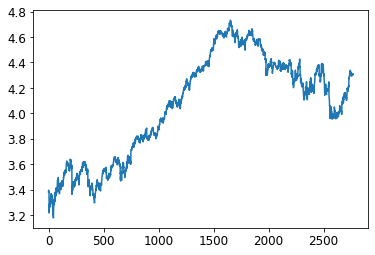

In [582]:
plt.plot(closeLog)

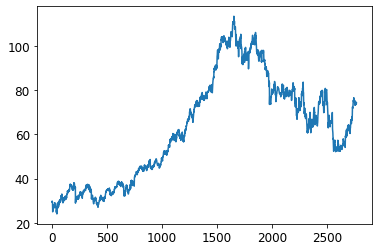

In [583]:
plt.plot(df["Close"])

It seems maybe as volumes goes down closing price goes up

In [584]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,28.809999,29.549999,28.559999,29.379999,23.839165,6352800
1,2009-01-05,29.370001,30.049999,29.370001,29.799999,24.179953,8583800
2,2009-01-06,30.000000,30.469999,29.090000,29.350000,23.814823,8914400
3,2009-01-07,29.010000,29.580000,28.750000,29.389999,23.847277,6758100
4,2009-01-08,28.430000,29.389999,27.950001,29.340000,23.806707,8779900
...,...,...,...,...,...,...,...
2763,2019-12-24,74.529999,74.779999,74.360001,74.510002,74.010536,1315400
2764,2019-12-26,74.699997,74.760002,74.139999,74.480003,73.980743,2801100
2765,2019-12-27,74.510002,74.610001,74.040001,74.400002,73.901276,3543500
2766,2019-12-30,74.269997,74.529999,73.610001,73.699997,73.205963,3450800


In [585]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,62.438891,62.985741,61.882601,62.444122,55.777565,7.845172e+06
std,23.736019,23.867033,23.563628,23.717242,22.463285,5.729768e+06
min,24.200001,24.590000,23.740000,23.980000,19.514372,1.315400e+06
25%,37.630001,37.960001,37.287501,37.542499,31.284608,4.822250e+06
50%,62.984998,63.615000,62.315000,62.935000,58.749033,6.705650e+06
75%,79.222501,79.822500,78.680000,79.257500,73.135637,9.422625e+06
max,113.349998,113.650002,112.449997,113.449997,101.086067,1.851235e+08


In [591]:
X = df.iloc[:, :4].copy()
X['Volume'] = df.iloc[:, -1].copy()
X = X.iloc[:-1, :]
for i in range(len(X['Date'])):
    X.iloc[i, 0] = float(pd.to_datetime(X.iloc[i, 0]).value)
X["Date"] = X["Date"].astype(np.float64)
Xs = (X-np.mean(X, axis=0))/np.std(X, axis=0)
T = df.iloc[:, 4].copy()
T = T.iloc[1:]

Xs.describe()

,Date,Open,High,Low,Volume
count,2.767000e+03,2.767000e+03,2.767000e+03,2.767000e+03,2.767000e+03
mean,-1.369830e-13,9.860803e-16,4.601708e-15,4.766055e-15,-9.244503e-17
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-1.731034e+00,-1.610901e+00,-1.608629e+00,-1.618600e+00,-1.139900e+00
25%,-8.678962e-01,-1.045072e+00,-1.048838e+00,-1.043748e+00,-5.273952e-01
50%,4.174787e-04,2.212453e-02,2.632923e-02,1.576941e-02,-1.990724e-01
75%,8.652803e-01,7.073973e-01,7.057462e-01,7.130607e-01,2.753123e-01
max,1.731869e+00,2.145143e+00,2.123031e+00,2.146264e+00,3.094154e+01


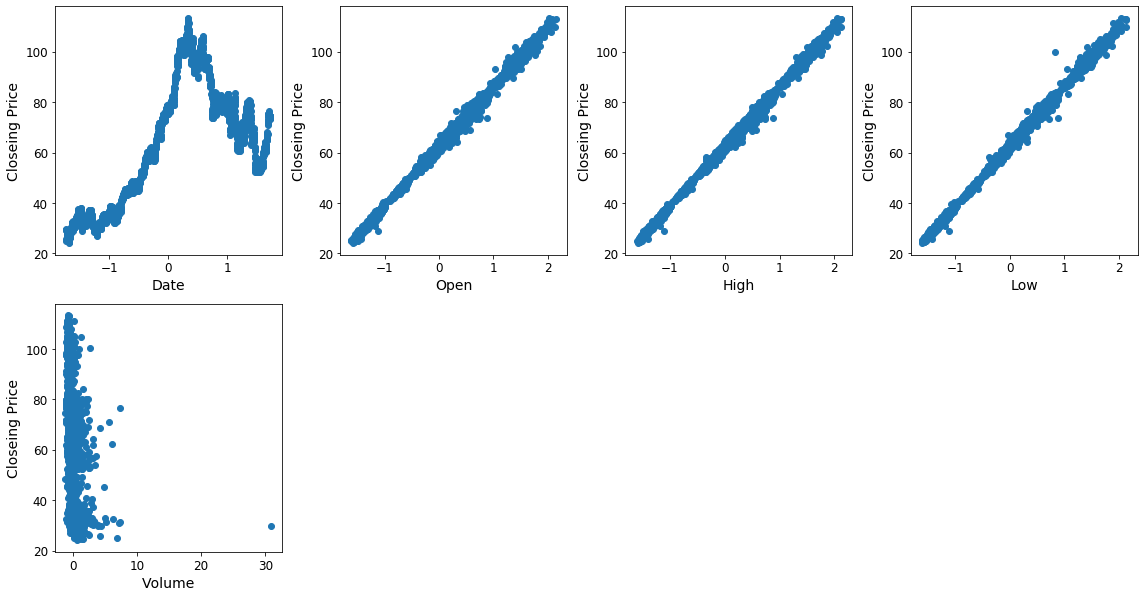

In [592]:
fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(5):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.scatter(Xs.iloc[:, i], T) # Plots a given column
    plt.ylabel("Closeing Price") # Sets Y label
    plt.xlabel(X.columns.values[i])
fig.tight_layout()

There seems to be slight variation between the diferent inputs but most of them follow the same patern in realtion to volume.

In [593]:
import partitionlib as ptl
# just in case, you made change in the file, you may need to reload as below
import importlib
import partitionlib
importlib.reload(partitionlib);

In [594]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X.values), copy(T.values))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

In [613]:
Xtrains, Xtests, Ttrain, Ttest = partition_data(Xs, T)
N, D = Xs.shape
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]

In [680]:
model = keras.Sequential([
    keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_242 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_243 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_244 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_245 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_246 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 6         
Total params: 156
Trainable params: 156
Non-trainable params: 0
_______________________________________________________

In [681]:
model.compile(loss="mse", optimizer="nadam")

In [682]:
history = model.fit(Xtrains, Ttrain, epochs=100, validation_split=0.2)

Train on 1771 samples, validate on 443 samples
Epoch 1/100
1771/1771 [==============================] - 2s 1ms/sample - loss: 4512.5605 - val_loss: 4284.8250
Epoch 2/100
1771/1771 [==============================] - 0s 49us/sample - loss: 4470.6233 - val_loss: 4199.1449
Epoch 3/100
1771/1771 [==============================] - 0s 49us/sample - loss: 4227.2668 - val_loss: 3692.5650
Epoch 4/100
1771/1771 [==============================] - 0s 47us/sample - loss: 3596.3485 - val_loss: 3112.7753
Epoch 5/100
1771/1771 [==============================] - 0s 47us/sample - loss: 3142.9382 - val_loss: 2622.6909
Epoch 6/100
1771/1771 [==============================] - 0s 48us/sample - loss: 2581.3213 - val_loss: 1888.3173
Epoch 7/100
1771/1771 [==============================] - 0s 47us/sample - loss: 1655.0602 - val_loss: 885.6087
Epoch 8/100
1771/1771 [==============================] - 0s 49us/sample - loss: 792.4041 - val_loss: 390.6036
Epoch 9/100
1771/1771 [==============================] - 0s 4

1771/1771 [==============================] - 0s 56us/sample - loss: 1.6284 - val_loss: 1.5096
Epoch 77/100
1771/1771 [==============================] - 0s 55us/sample - loss: 1.6026 - val_loss: 1.5759
Epoch 78/100
1771/1771 [==============================] - 0s 52us/sample - loss: 1.6187 - val_loss: 1.4939
Epoch 79/100
1771/1771 [==============================] - 0s 50us/sample - loss: 1.5967 - val_loss: 1.5199
Epoch 80/100
1771/1771 [==============================] - 0s 50us/sample - loss: 1.5785 - val_loss: 1.5364
Epoch 81/100
1771/1771 [==============================] - 0s 50us/sample - loss: 1.5904 - val_loss: 1.4404
Epoch 82/100
1771/1771 [==============================] - 0s 49us/sample - loss: 1.5914 - val_loss: 1.5234
Epoch 83/100
1771/1771 [==============================] - 0s 48us/sample - loss: 1.5843 - val_loss: 1.5231
Epoch 84/100
1771/1771 [==============================] - 0s 47us/sample - loss: 1.5677 - val_loss: 1.4092
Epoch 85/100
1771/1771 [==========================

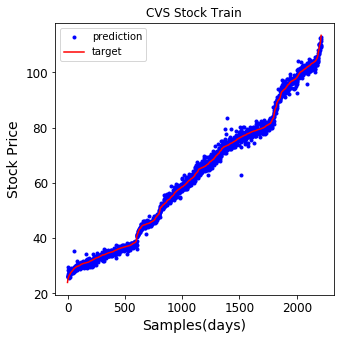

In [689]:
Y = model.predict(Xtrains)
plot_result(Y, Ttrain, title="CVS Stock Train")

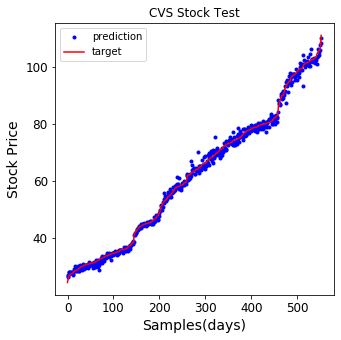

In [690]:
Y = model.predict(Xtests)
plot_result(Y, Ttest, title="CVS Stock Test")

In [697]:
mean_squared_error(Ttest, Y)

1.4736246018833405

In [719]:
fivePercentOff = 0
tenPercentOff = 0
belowFivePercent = 0

for i in range(len(Y)):
    if(abs(Y[i] - Ttest[i]) > Ttest[i]*.1):
        tenPercentOff += 1
    elif(abs(Y[i] - Ttest[i]) > Ttest[i]*.03):
        fivePercentOff += 1
    else:
        belowFivePercent += 1

In [720]:
fivePercentOff

64

In [721]:
tenPercentOff

1

In [722]:
belowFivePercent

488

In [659]:
len(Y)

553

In [647]:
Ttest 1.865

array([[ 37.299999],
       [100.980003],
       [ 66.940002],
       [ 64.800003],
       [ 33.919998],
       [ 79.860001],
       [110.980003],
       [101.440002],
       [ 32.93    ],
       [ 32.880001],
       [ 77.959999],
       [ 33.029999],
       [ 35.810001],
       [ 28.99    ],
       [ 35.209999],
       [ 44.619999],
       [ 94.110001],
       [ 74.089996],
       [ 80.400002],
       [ 62.990002],
       [ 33.860001],
       [ 79.75    ],
       [ 80.68    ],
       [ 29.530001],
       [ 75.540001],
       [ 35.869999],
       [ 52.66    ],
       [ 57.59    ],
       [ 82.919998],
       [ 65.099998],
       [ 64.980003],
       [ 89.25    ],
       [ 41.75    ],
       [ 27.73    ],
       [ 47.810001],
       [ 79.120003],
       [ 33.75    ],
       [ 33.77    ],
       [ 65.989998],
       [ 81.949997],
       [ 90.870003],
       [ 78.110001],
       [ 82.669998],
       [ 68.769997],
       [ 46.34    ],
       [ 98.269997],
       [ 80.050003],
       [ 98.4